In [1]:
import os
print(os.path.exists(r'c:\Users\Ayan\Documents\DSA 2040_Practical_Exam_Ilham_152\data_warehousing\task2_etl\retail_dw.db'))


True


✅ Database connected successfully.


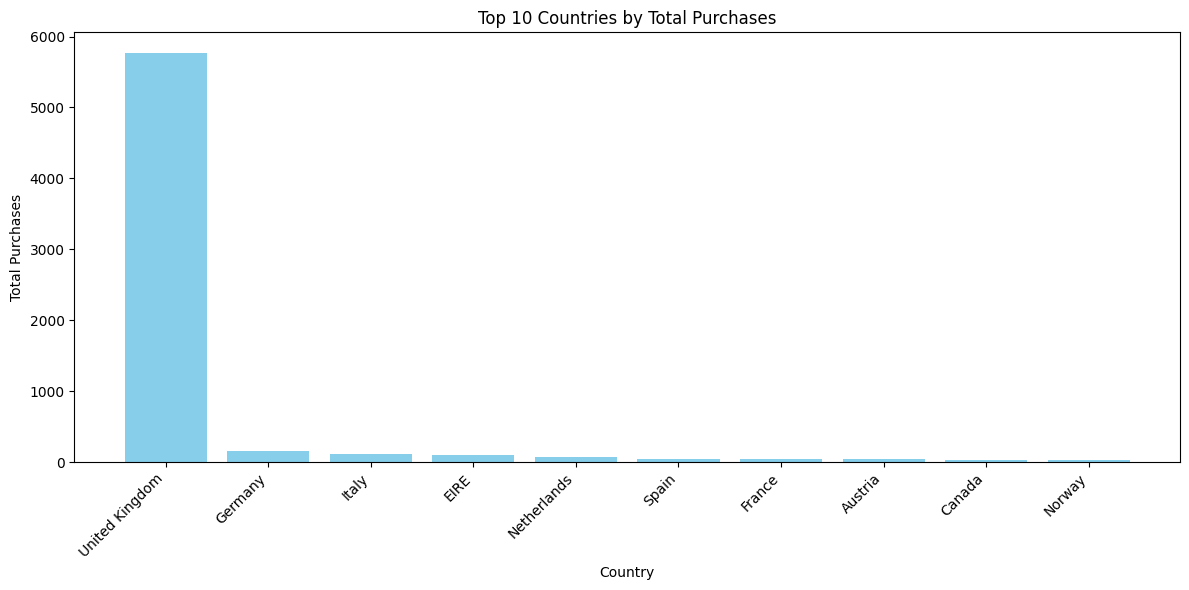

📈 Bar chart saved as 'sales_by_country_analysis.png'


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def visualize_sales_by_country(db_path):
    """
    Visualizes total purchases by country from the database and saves the chart as an image.
    """
    try:
        conn = sqlite3.connect(db_path)
        print("✅ Database connected successfully.")

        # Query total purchases by country
        query = """
        SELECT Country, SUM(TotalPurchases) AS TotalPurchases
        FROM CustomerDim
        GROUP BY Country
        ORDER BY TotalPurchases DESC
        LIMIT 10;
        """
        
        df = pd.read_sql_query(query, conn)
        conn.close()

        if df.empty:
            print("⚠️ Query returned no data.")
            return

        # Plot the bar chart
        plt.figure(figsize=(12, 6))
        plt.bar(df['Country'], df['TotalPurchases'], color='skyblue')
        plt.xlabel('Country')
        plt.ylabel('Total Purchases')
        plt.title('Top 10 Countries by Total Purchases')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('sales_by_country_analysis.png')
        plt.show()
        print("📈 Bar chart saved as 'sales_by_country_analysis.png'")

    except Exception as e:
        print(f"❌ An error occurred: {e}")

if __name__ == '__main__':
    db_path = r'c:\Users\Ayan\Documents\DSA 2040_Practical_Exam_Ilham_152\data_warehousing\task2_etl\retail_dw.db'
    visualize_sales_by_country(db_path)

